# Bitcoin Price Prediction Using Twitter Sentimental Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import datetime
from dateutil import parser

## Bitcoin Price Analysis

In [ ]:
btc_data = pd.read_csv("crytpo_data.csv", index_col = 0)
btc_data.head()

In [ ]:
btc_data.describe()

In [ ]:
btc_data['time'] = pd.to_datetime(btc_data['time'])
btc_data = btc_data.sort_values(by='time')


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(btc_data["time"], btc_data["price"])
plt.xlabel('Time')
plt.ylabel('Bitcoin Price ($)')
plt.title('Bitcoin Price Movement')

plt.gcf().autofmt_xdate()
plt.show()

## II Twitter Sentimental Analysis

In [16]:
tw_data = pd.read_csv('twitter_data.csv',index_col=0)
tw_data.head(5)

,symbol,name,tweet_id,screen_name,bookmarks,favorites,created_at,text,lang,quotes,replies,retweets,time
_id,,,,,,,,,,,,,
671fe1125a22311369600909,BTC,bitcoin,1849905253916786767,hamptonism,1144.0,9408.0,Fri Oct 25 20:05:56 +0000 2024,Switzerland unveils a new statue honoring the ...,en,78.0,113.0,803.0,2024-10-28 19:08:02.786000
671fe1125a2231136960090a,BTC,bitcoin,1850228656704049285,Ashcryptoreal,88.0,9210.0,Sat Oct 26 17:31:02 +0000 2024,"If Bitcoin breaks $72,000 by the end \nof Octo...",en,21.0,952.0,1278.0,2024-10-28 19:08:02.786000
671fe1125a2231136960090b,BTC,bitcoin,1849812562323325395,Vivek4real_,23.0,4219.0,Fri Oct 25 13:57:37 +0000 2024,"Like, If you think Microsoft should convert $7...",en,14.0,163.0,339.0,2024-10-28 19:08:02.786000
671fe1125a2231136960090c,BTC,bitcoin,1849150584693076274,MarwanNawaz,6.0,458.0,Wed Oct 23 18:07:09 +0000 2024,"Michael Saylor would ""volunteer"" his Bitcoin t...",en,3.0,9.0,74.0,2024-10-28 19:08:02.786000
671fe1125a2231136960090d,BTC,bitcoin,1848948161806798989,naiivememe,1779.0,10437.0,Wed Oct 23 04:42:48 +0000 2024,Me leaving my 9-5 job when Bitcoin hits 250K\n...,en,104.0,272.0,889.0,2024-10-28 19:08:02.786000


### Flair Sentiment Analysis
- Test out Flair using selected twitter sample.
- Reference: [Flair](https://github.com/flairNLP/flair)

In [17]:
from flair.data import Sentence
from flair.nn import Classifier

sample = tw_data.iloc[0]["text"]
print("Sample: ", sample)
sentence = Sentence(sample)

tagger = Classifier.load('sentiment')
tagger.predict(sentence)

print("Sentiment Value: ", sentence.labels[0].value)
print("Sentiment Confidence: ", sentence.labels[0].score)

Sample:  Switzerland unveils a new statue honoring the creator of Bitcoin, 
Satoshi Nakamoto. https://t.co/viEr8u1KEQ
Sentiment Value:  POSITIVE
Sentiment Confidence:  0.9328526854515076


## VADER Sentiment Analysis
- Test out VADER using selected Twitter sample.
- Reference: [VADER Sentiment Analysis](https://github.com/cjhutto/vaderSentiment)

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sample = tw_data.iloc[0]["text"]
print("Sample: ", sample)

analyzer = SentimentIntensityAnalyzer()

vs = analyzer.polarity_scores(sample)
print("{:-<65} {}".format(sample, str(vs)))

Sample:  Switzerland unveils a new statue honoring the creator of Bitcoin, 
Satoshi Nakamoto. https://t.co/viEr8u1KEQ
Switzerland unveils a new statue honoring the creator of Bitcoin, 
Satoshi Nakamoto. https://t.co/viEr8u1KEQ {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.5106}


### Data Preprocessing
- Extract link values from the **text** column with regex.
- Remove all "\n" from the **text** column.
- Assert if there is any missing value for the **text** column.
- Assert if there is any empty string for the **text** column.

In [19]:
import re
import util.text as t

In [ ]:
# Assert if there is any missing values for the **text** column
assert tw_data.isnull().sum()['text'] == 0

In [ ]:
# If there is missing values, drop these missing values
tw_data = tw_data.dropna()

In [21]:
# Extract link values from the **text** column with regex.
tw_data['text'] = tw_data['text'].apply(
  lambda x: re.sub(r'https?://\S+', '', x).strip()
  )  
# Remove all "\n" from the **text** column.
tw_data['text'] = tw_data['text'].replace('\n', '', regex=True)

tw_data.iloc[1]['text']

'If Bitcoin breaks $72,000 by the end of October, I will give $2,000 BTC to 20 people who like this post.'

In [22]:
# Assert if there is any missing values for the **text** column
assert tw_data.isnull().sum()['text'] == 0

In [23]:
# Assert if there is any empty strings for the **text** column
assert len(tw_data.index[tw_data['text'] == ''].tolist()) == 0

AssertionError: 

In [24]:
# Check empty string for the **text** colum
print("Number of empty strings: ", len(tw_data.index[tw_data['text'] == ''].tolist()))
tw_data.index[tw_data['text'] == ''].tolist()[:5]

Number of empty strings:  39


['6725c23c2ecab7f9c39b03c1',
 '6725fa7e69400ce2a905b5de',
 '6726952c7222003579d6c677',
 '6726a33c966067f276961a06',
 '6726bf5f062b2dc3b39b4ca1']

In [25]:
# Apply Flair sentiment anaylysis to the twitter dataset.
tw_data[['fl_sentiment', 'fl_confidence']] = tw_data['text'].apply(
  lambda x: pd.Series(t.flair_sentiment(x))
  )

tw_data['fl_sentiment'].head(1)
tw_data['fl_confidence'].head(1)

String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No 

_id
671fe1125a22311369600909    0.837527
Name: fl_confidence, dtype: float64

In [26]:
# Apply VADER sentiment anaylysis to the twitter dataset.
tw_data[['vd_negative', 'vd_neutral', 'vd_positive', 'vd_compound']] = tw_data['text'].apply(
  lambda x: pd.Series(t.vader_sentiment(x))
  )

tw_data.head(1)

String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No result.
String is empty. No 

,symbol,name,tweet_id,screen_name,bookmarks,favorites,created_at,text,lang,quotes,replies,retweets,time,fl_sentiment,fl_confidence,vd_negative,vd_neutral,vd_positive,vd_compound
_id,,,,,,,,,,,,,,,,,,,
671fe1125a22311369600909,BTC,bitcoin,1849905253916786767,hamptonism,1144.0,9408.0,Fri Oct 25 20:05:56 +0000 2024,Switzerland unveils a new statue honoring the ...,en,78.0,113.0,803.0,2024-10-28 19:08:02.786000,POSITIVE,0.837527,0.0,0.769,0.231,0.5106


In [27]:
# Convert current cleaned data to csv
tw_data.to_csv('updated_twitter_data.csv', index=False)

## Visualize Preprocessed Data

In [28]:
tw_data = pd.read_csv('updated_twitter_data.csv',index_col=0)
tw_data.describe()

,tweet_id,bookmarks,favorites,quotes,replies,retweets,fl_confidence,vd_negative,vd_neutral,vd_positive,vd_compound
count,1.207800e+04,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12039.000000,12039.000000,12039.000000,12039.000000,12039.000000
mean,1.855260e+18,320.077745,6307.339129,67.245984,594.567395,1260.782083,0.948589,0.026164,0.880151,0.093680,0.192342
std,5.680791e+15,885.494704,11757.474182,223.043356,1895.199431,2832.791556,0.100787,0.077826,0.141223,0.127636,0.386998
min,1.722846e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.504757,0.000000,0.218000,0.000000,-0.945100
25%,1.852763e+18,19.000000,825.000000,5.000000,49.000000,136.000000,0.956594,0.000000,0.775000,0.000000,0.000000
50%,1.855918e+18,80.000000,2701.000000,18.000000,169.000000,426.000000,0.997250,0.000000,0.917000,0.000000,0.000000
75%,1.858449e+18,241.000000,7029.500000,49.000000,469.000000,1193.750000,0.999667,0.000000,1.000000,0.187000,0.492600
max,1.861854e+18,17293.000000,208292.000000,3902.000000,50094.000000,43987.000000,0.999997,0.705000,1.000000,0.782000,0.995400


### Visualize Flair Sentiment Movements

In [29]:
# Preprocess fl_confidence value by fl_sentiment column.
tw_data['fl_confidence'] = np.where(tw_data['fl_sentiment'] == 'NEGATIVE', 
                                 -tw_data['fl_confidence'], 
                                 tw_data['fl_confidence'])
tw_data.head(3)

,name,tweet_id,screen_name,bookmarks,favorites,created_at,text,lang,quotes,replies,retweets,time,fl_sentiment,fl_confidence,vd_negative,vd_neutral,vd_positive,vd_compound
symbol,,,,,,,,,,,,,,,,,,
BTC,bitcoin,1849905253916786767,hamptonism,1144.0,9408.0,Fri Oct 25 20:05:56 +0000 2024,Switzerland unveils a new statue honoring the ...,en,78.0,113.0,803.0,2024-10-28 19:08:02.786000,POSITIVE,0.837527,0.0,0.769,0.231,0.5106
BTC,bitcoin,1850228656704049285,Ashcryptoreal,88.0,9210.0,Sat Oct 26 17:31:02 +0000 2024,"If Bitcoin breaks $72,000 by the end of Octobe...",en,21.0,952.0,1278.0,2024-10-28 19:08:02.786000,NEGATIVE,-0.999922,0.0,0.889,0.111,0.3612
BTC,bitcoin,1849812562323325395,Vivek4real_,23.0,4219.0,Fri Oct 25 13:57:37 +0000 2024,"Like, If you think Microsoft should convert $7...",en,14.0,163.0,339.0,2024-10-28 19:08:02.786000,NEGATIVE,-0.999045,0.0,0.839,0.161,0.3612


### 1. Visualize Mean and Median Values
- Calculate the mean and median of **confidence** column grouped by each hour.
- Calculate the mean and median of **confidence** column grouped by day.

In [30]:
tw_data['time'] = pd.to_datetime(tw_data['time'])

In [60]:
tw_data = tw_data.sort_values(by='time')

# Hourly mean
hr_mean = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )['fl_confidence'].mean().reset_index()

hr_mean.head()

,time,fl_confidence
0,2024-10-28 19:00:00,-0.659364
1,2024-10-28 20:00:00,-0.856142
2,2024-10-28 21:00:00,-0.547036
3,2024-10-28 22:00:00,-0.756660
4,2024-10-28 23:00:00,-0.620880


In [59]:
# Hourly median
hr_med = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )['fl_confidence'].median().reset_index()

hr_med.head()

,time,fl_confidence
0,2024-10-28 19:00:00,-0.962878
1,2024-10-28 20:00:00,-0.992461
2,2024-10-28 21:00:00,-0.991899
3,2024-10-28 22:00:00,-0.999045
4,2024-10-28 23:00:00,-0.966333


In [58]:
# Hourly standard deviation
hr_std = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )['fl_confidence'].std().reset_index()

hr_std.head()

,time,fl_confidence
0,2024-10-28 19:00:00,0.691188
1,2024-10-28 20:00:00,0.479230
2,2024-10-28 21:00:00,0.801825
3,2024-10-28 22:00:00,0.631571
4,2024-10-28 23:00:00,0.749525


/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_19302/2368865180.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


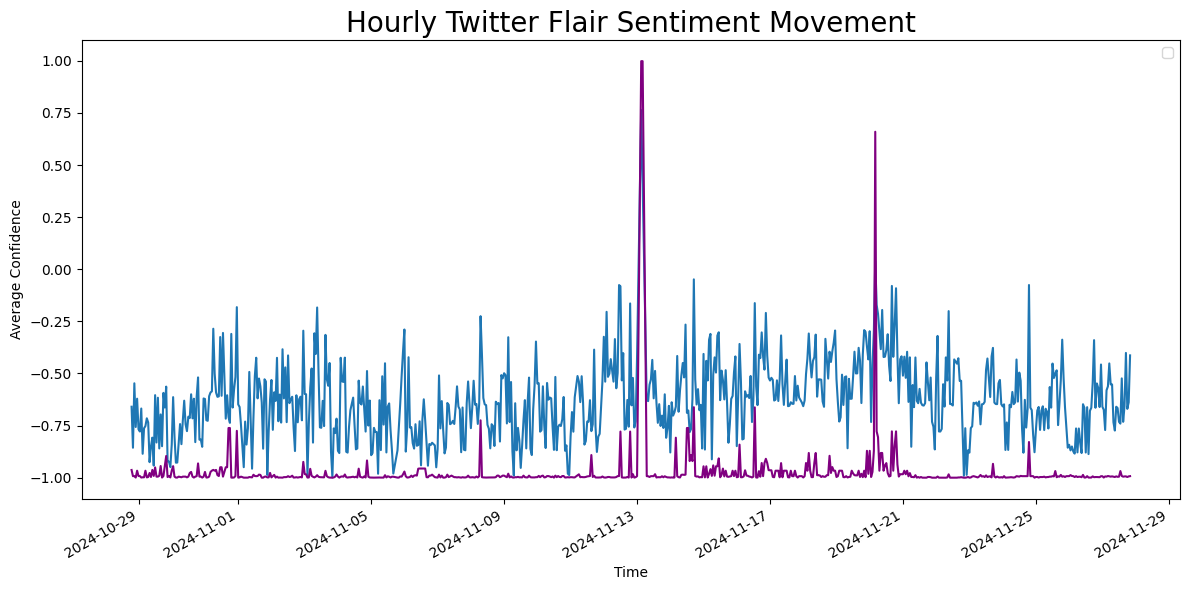

In [61]:
plt.figure(figsize=(12, 6))

plt.plot(hr_mean['time'], hr_mean['fl_confidence'])
plt.plot(hr_med['time'], hr_med['fl_confidence'], color='purple')

plt.title('Hourly Twitter Flair Sentiment Movement', fontsize=20)
plt.xlabel('Time')
plt.ylabel('Average Confidence')

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
# Daily mean
day_mean = tw_data.groupby(
  tw_data['time'].dt.floor('d')
  )['fl_confidence'].mean().reset_index()

day_mean.head()

,time,fl_confidence
0,2024-10-28,-0.683241
1,2024-10-29,-0.777407
2,2024-10-30,-0.742708
3,2024-10-31,-0.552631
4,2024-11-01,-0.686260


In [54]:
# Daily median
day_med = tw_data.groupby(
  tw_data['time'].dt.floor('d')
  )['fl_confidence'].median().reset_index()

day_med.head()

,time,fl_confidence
0,2024-10-28,-0.992180
1,2024-10-29,-0.994748
2,2024-10-30,-0.994748
3,2024-10-31,-0.965998
4,2024-11-01,-0.998059


/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_19302/4223029353.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


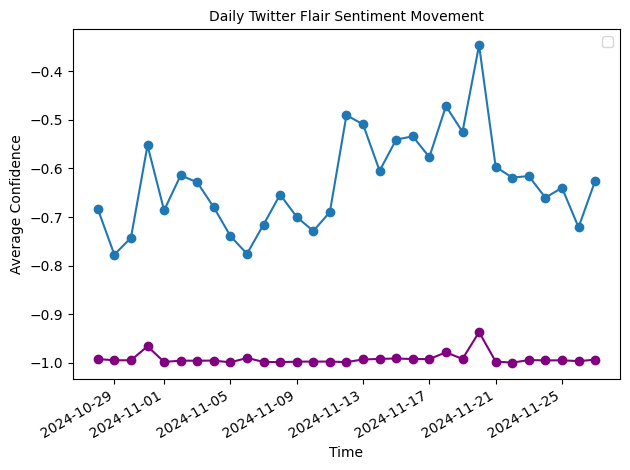

In [56]:
plt.figure()

plt.plot(day_mean['time'], day_mean['fl_confidence'], marker='o')
plt.plot(day_med['time'], day_med['fl_confidence'], color='purple', marker='o')

plt.title('Daily Twitter Flair Sentiment Movement', fontsize=10)
plt.xlabel('Time')
plt.ylabel('Average Confidence')

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

### 2. Visualize Sentiment Values
- For every hour, retrieve the number of "NEGATIVE" and "POSITIVE" from the **sentiment** column.
- Drop any empty data from **sentiment** column.

In [35]:
# For every hour, retrieve the number of "NEGATIVE" and "POSITIVE" from the **sentiment** column.
hr_pos_neg = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )['fl_sentiment'].value_counts().unstack().reset_index()

hr_pos_neg.head()

fl_sentiment,time,NEGATIVE,POSITIVE
0,2024-10-28 19:00:00,28.0,6.0
1,2024-10-28 20:00:00,16.0,1.0
2,2024-10-28 21:00:00,13.0,4.0
3,2024-10-28 22:00:00,15.0,2.0
4,2024-10-28 23:00:00,14.0,3.0


In [36]:
# Check if there is any empty data
hr_pos_neg.isnull().sum()

fl_sentiment
time         0
NEGATIVE     0
POSITIVE    24
dtype: int64

In [37]:
# Drop any empty data
hr_pos_neg = hr_pos_neg.dropna()[1:]

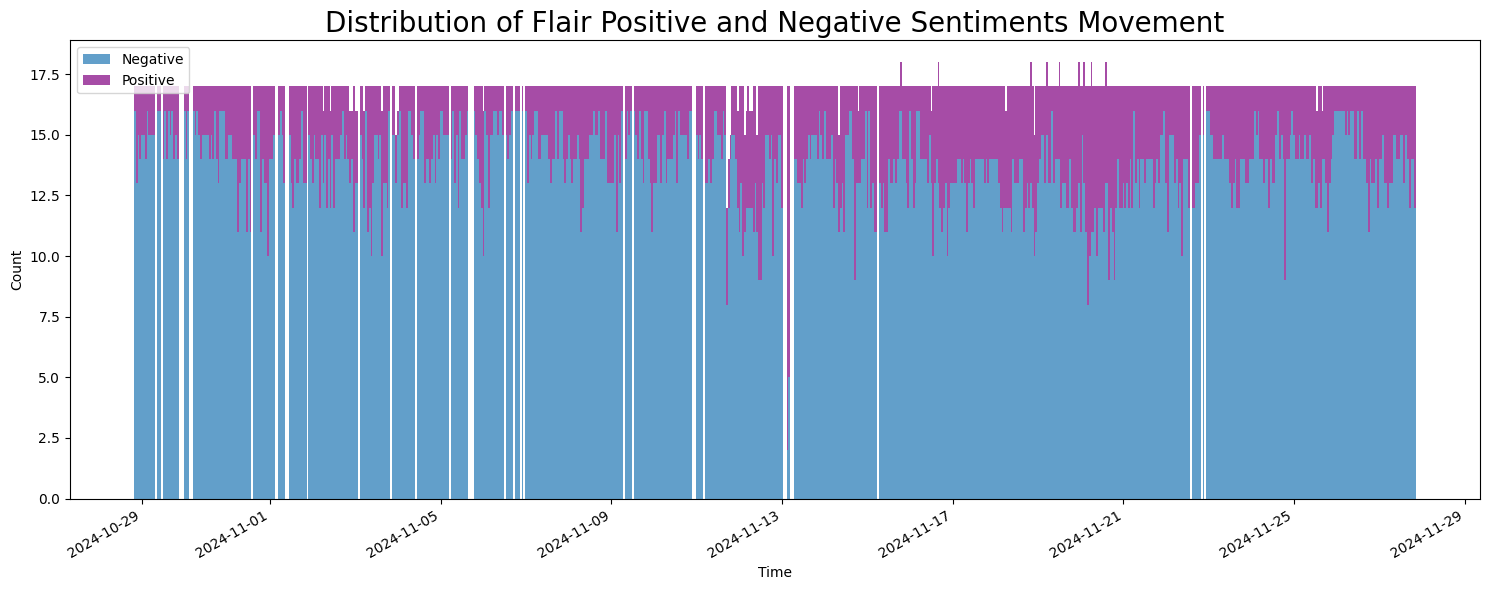

In [38]:
plt.figure(figsize=(15, 6))

plt.bar(hr_pos_neg['time'], hr_pos_neg['NEGATIVE'], width=1/24,
        alpha=0.7, label='Negative')

plt.bar(hr_pos_neg['time'], hr_pos_neg['POSITIVE'], width=1/24,
        bottom=hr_pos_neg['NEGATIVE'], color='purple', alpha=0.7, label='Positive')

plt.title('Distribution of Flair Positive and Negative Sentiments Movement', fontsize=20)
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

### Visualize VADER Sentiment Movement
- Calculate the mean and median of **confidence** column grouped by each hour.
- Calculate the mean and median of **confidence** column grouped by day.

In [ ]:
# Hourly mean
hr_mean = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )[['vd_positive', 'vd_negative', 'vd_neutral', 'vd_compound']].mean().reset_index()

hr_mean.head()

,time,vd_positive,vd_negative,vd_neutral,vd_compound
0,2024-10-28 19:00:00,0.067324,0.039471,0.893147,0.090591
1,2024-10-28 20:00:00,0.055529,0.025824,0.918588,0.071700
2,2024-10-28 21:00:00,0.115412,0.000000,0.884588,0.287594
3,2024-10-28 22:00:00,0.070941,0.093176,0.835882,0.001594
4,2024-10-28 23:00:00,0.130353,0.000000,0.869647,0.282982


In [ ]:
# Hourly median
hr_med = tw_data.groupby(
  tw_data['time'].dt.floor('h')
  )[['vd_positive', 'vd_negative', 'vd_neutral', 'vd_compound']].median().reset_index()

hr_med.head()

,time,vd_positive,vd_negative,vd_neutral,vd_compound
0,2024-10-28 19:00:00,0.000,0.0,0.903,0.0000
1,2024-10-28 20:00:00,0.000,0.0,1.000,0.0000
2,2024-10-28 21:00:00,0.123,0.0,0.877,0.3182
3,2024-10-28 22:00:00,0.000,0.0,0.839,0.0000
4,2024-10-28 23:00:00,0.123,0.0,0.877,0.3182


/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_19302/3785543367.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


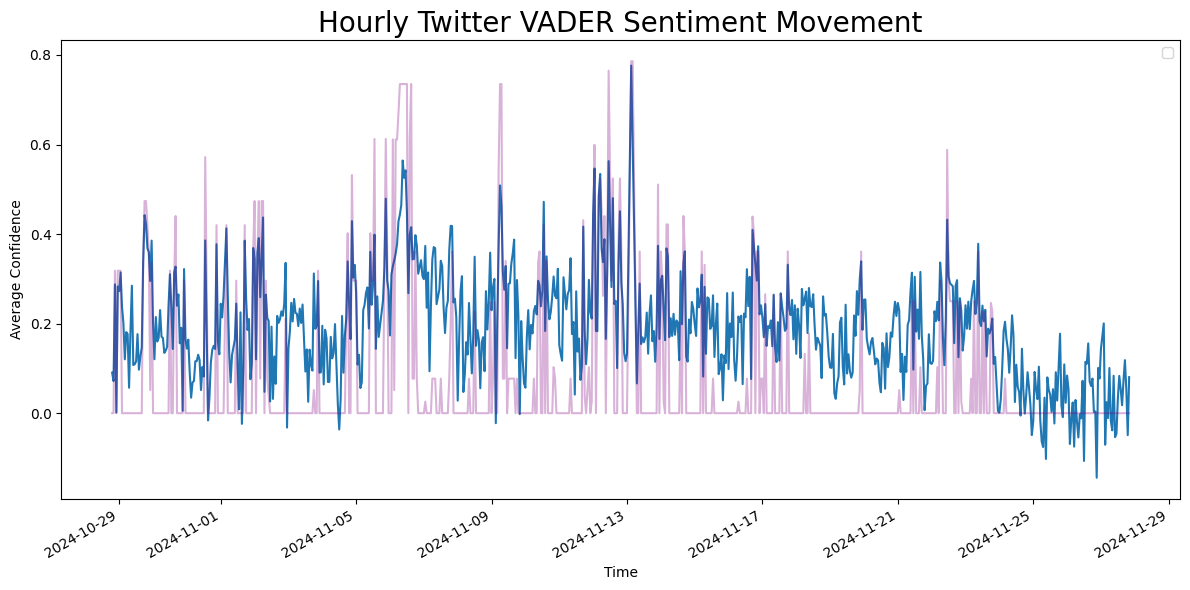

In [42]:
plt.figure(figsize=(12, 6))

plt.plot(hr_mean['time'], hr_mean['vd_compound'])
plt.plot(hr_med['time'], hr_med['vd_compound'], color='purple', alpha=0.3)

plt.title('Hourly Twitter VADER Sentiment Movement', fontsize=20)
plt.xlabel('Time')
plt.ylabel('Average Confidence')

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()

In [47]:
# Dayly mean
day_mean = tw_data.groupby(
  tw_data['time'].dt.floor('d')
  )[['vd_positive', 'vd_negative', 'vd_neutral', 'vd_compound']].mean().reset_index()

day_mean.head()

,time,vd_positive,vd_negative,vd_neutral,vd_compound
0,2024-10-28,0.084480,0.032990,0.882500,0.137509
1,2024-10-29,0.087436,0.020728,0.891824,0.229950
2,2024-10-30,0.078708,0.015728,0.905576,0.199071
3,2024-10-31,0.066368,0.030445,0.903187,0.126812
4,2024-11-01,0.080500,0.029864,0.889636,0.188688


In [48]:
# Dayly median
day_med = tw_data.groupby(
  tw_data['time'].dt.floor('d')
  )[['vd_positive', 'vd_negative', 'vd_neutral', 'vd_compound']].median().reset_index()

day_med.head()

,time,vd_positive,vd_negative,vd_neutral,vd_compound
0,2024-10-28,0.0,0.0,0.889,0.0
1,2024-10-29,0.0,0.0,0.889,0.0
2,2024-10-30,0.0,0.0,1.000,0.0
3,2024-10-31,0.0,0.0,1.000,0.0
4,2024-11-01,0.0,0.0,1.000,0.0


/var/folders/f6/jjmfkpp52bzg1lpytwjwn5jc0000gn/T/ipykernel_19302/680735560.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


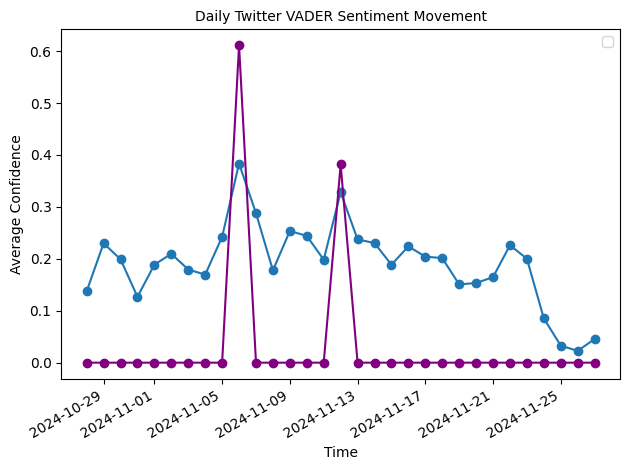

In [52]:
plt.figure()

plt.plot(day_mean['time'], day_mean['vd_compound'], marker='o')
plt.plot(day_med['time'], day_med['vd_compound'], color='purple',  marker='o')

plt.title('Daily Twitter VADER Sentiment Movement', fontsize=10)
plt.xlabel('Time')
plt.ylabel('Average Confidence')

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend()
plt.show()